In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

dataFrame = pd.read_csv("../data/charging_sessions_cleaned.csv", parse_dates=["connectionTime", "disconnectTime", "doneChargingTime"])


#dataFrame["duration"] = dataFrame["disconnectTime"] - dataFrame["connectionTime"]

In [2]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66448 entries, 0 to 66447
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Unnamed: 0               66448 non-null  int64              
 1   id                       66448 non-null  object             
 2   connectionTime           66448 non-null  datetime64[ns, UTC]
 3   disconnectTime           66448 non-null  datetime64[ns, UTC]
 4   doneChargingTime         62360 non-null  datetime64[ns, UTC]
 5   kWhDelivered             66448 non-null  float64            
 6   sessionID                66448 non-null  object             
 7   siteID                   66448 non-null  int64              
 8   stationID                66448 non-null  object             
 9   timezone                 66448 non-null  object             
 10  userID                   49185 non-null  float64            
 11  userInputs               491

In [3]:
#add a column in dataFrame that contains the duration until the vehicle is fully charged, being the time differrence between connectionTime and doneChargingTime
#dataFrame["durationUntilFullCharge"] = dataFrame["doneChargingTime"] - dataFrame["connectionTime"]


In [4]:
#dataFrame["durationUntilFullCharge"] = dataFrame["durationUntilFullCharge"].dt.total_seconds() / 3600
#dataFrame["duration"] = dataFrame["duration"].dt.total_seconds() / 3600


In [5]:
#add a new column in dataFrame that is the charging power. to do so, calculate kWhdelivered / durationuntilfullcharge
#dataFrame["chargingPower"] = dataFrame["kWhDelivered"] / dataFrame["durationUntilFullCharge"]

In [6]:
dataFrame1 = dataFrame[dataFrame["siteID"] == 1]
dataFrame2 = dataFrame[dataFrame["siteID"] == 2]

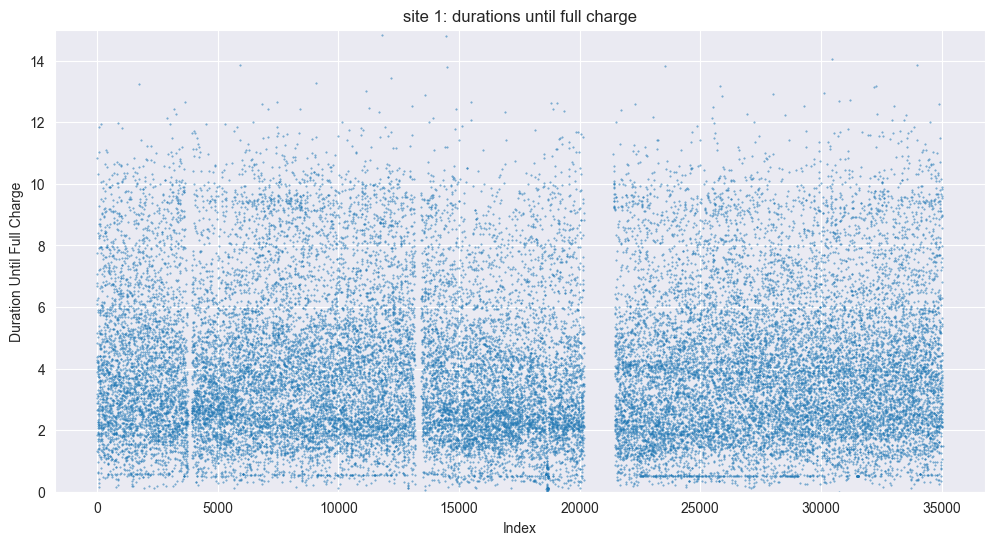

In [7]:
dataFrame1 = dataFrame1.reset_index(drop=True)

plt.figure(figsize=(12, 6))  # Adjust the figure size (longer width)
plt.scatter(dataFrame1.index, dataFrame1['durationUntilFullCharge'], s=.2, alpha=0.7)  # Scatter plot with smaller dots
#plt.yticks([0, 0.25, 0.5, 0.75, 1, 2, 4, 11])
#plt.yscale("symlog")  # Set the y-axis to logarithmic scale
plt.ylim(0,15)
plt.xlabel("Index")
plt.ylabel("Duration Until Full Charge")
plt.title("site 1: durations until full charge")
plt.show()

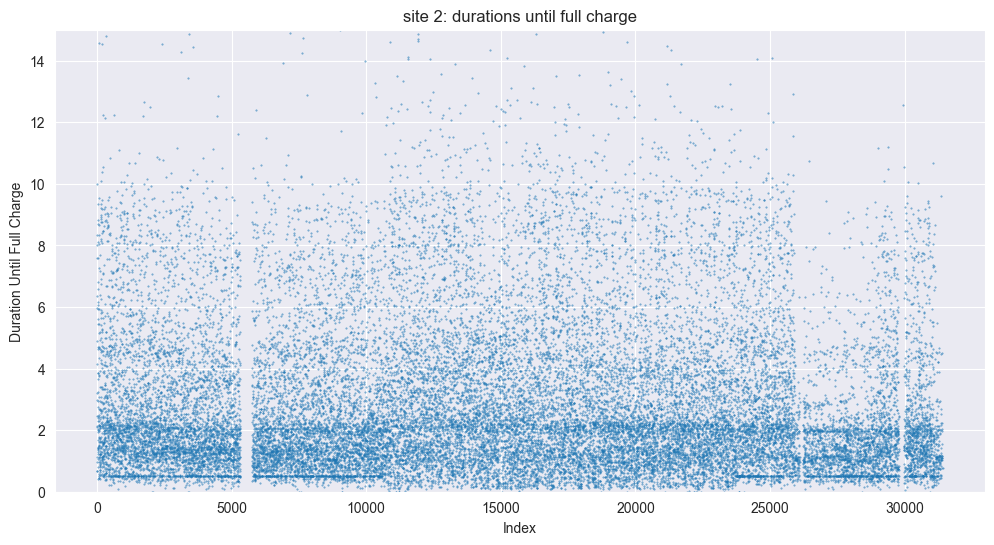

In [8]:
dataFrame2 = dataFrame2.reset_index(drop=True)

plt.figure(figsize=(12, 6))  # Adjust the figure size (longer width)
plt.scatter(dataFrame2.index, dataFrame2['durationUntilFullCharge'], s=.2, alpha=0.7)  # Scatter plot with smaller dots
#plt.yticks([0, 0.25, 0.5, 0.75, 1, 2, 4, 11])
#plt.yscale("symlog")  # Set the y-axis to logarithmic scale
plt.ylim(0,15)
plt.xlabel("Index")
plt.ylabel("Duration Until Full Charge")
plt.title("site 2: durations until full charge")
plt.show()

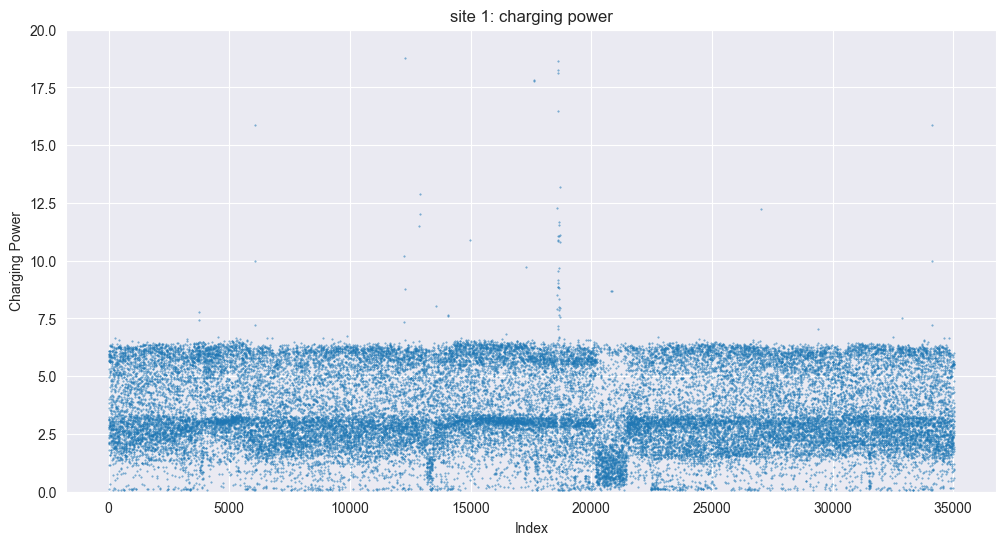

In [9]:
#plot chargingpower for site 1
plt.figure(figsize=(12, 6))
plt.scatter(dataFrame1.index, dataFrame1["chargingPower"], s=.2, alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Charging Power")
plt.title("site 1: charging power")
plt.ylim(0,20)
plt.show()


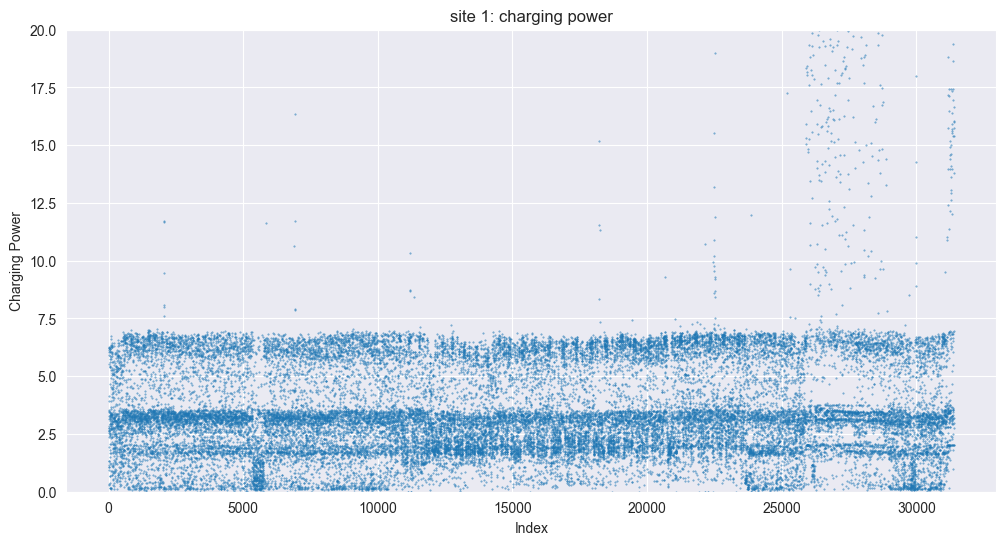

In [10]:
#plot chargingpower for site 2
plt.figure(figsize=(12, 6))
plt.scatter(dataFrame2.index, dataFrame2["chargingPower"], s=.2, alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Charging Power")
plt.title("site 1: charging power")
plt.ylim(0,20)
plt.show()

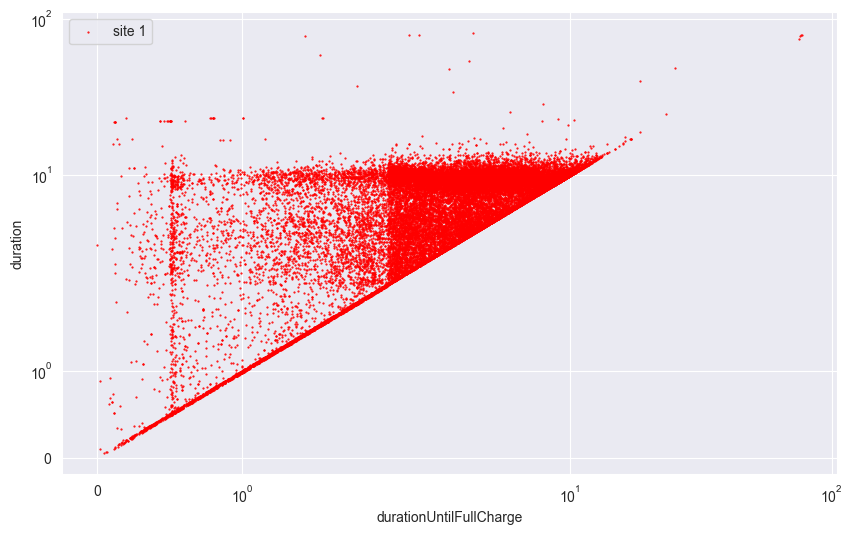

In [11]:
#plot durationUntilFullCharge and duration for site 1 and use a logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(dataFrame1["durationUntilFullCharge"], dataFrame1["duration"], color="red", label="site 1", s=.3)
plt.yscale("symlog")
plt.xscale("symlog")
plt.xlabel("durationUntilFullCharge")
plt.ylabel("duration")
plt.legend()
plt.show()


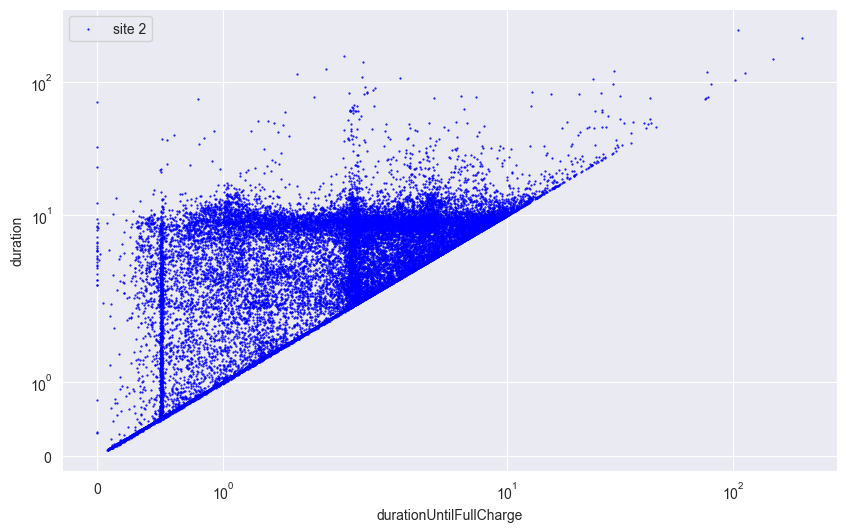

In [12]:

plt.figure(figsize=(10, 6))
plt.scatter(dataFrame2["durationUntilFullCharge"], dataFrame2["duration"], color="blue", label="site 2", s=.3)
plt.yscale("symlog")
plt.xscale("symlog")
plt.xlabel("durationUntilFullCharge")
plt.ylabel("duration")
plt.legend()
plt.show()

In [13]:
df = pd.read_csv("../data/charging_sessions_cleaned.csv", parse_dates=["connectionTime", "disconnectTime", "doneChargingTime"])

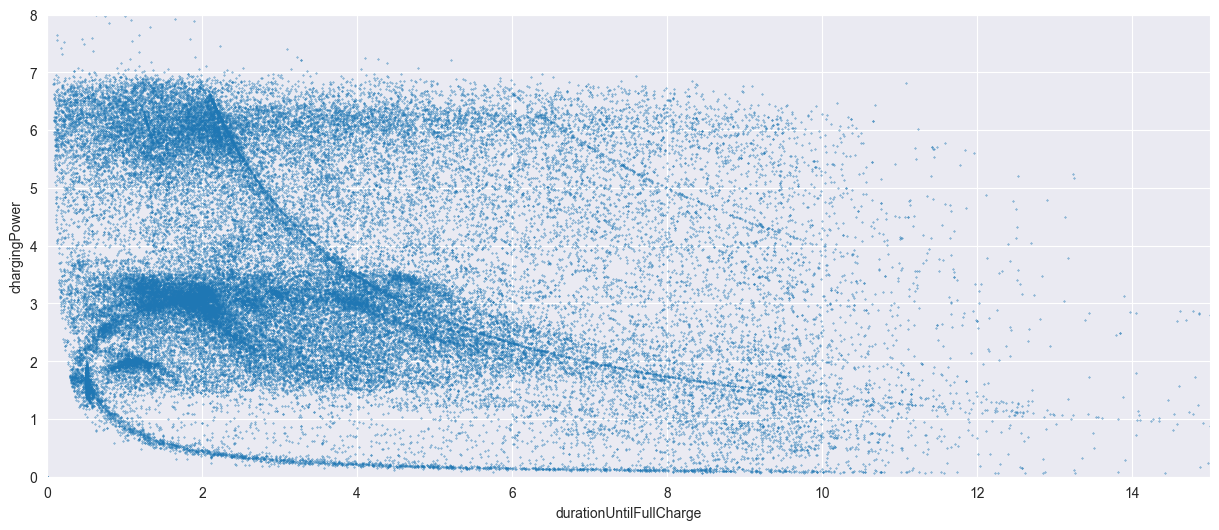

In [14]:
#plot the chargingpower against the kwh delivered for df
plt.figure(figsize=(15, 6))
plt.scatter(df["durationUntilFullCharge"], df["chargingPower"], s=.1)
plt.xlabel("durationUntilFullCharge")
plt.ylim(0,8)
plt.xlim(0,15)
#plt.xscale("symlog")
plt.ylabel("chargingPower")
plt.show()


Text(0, 0.5, 'spaceID')

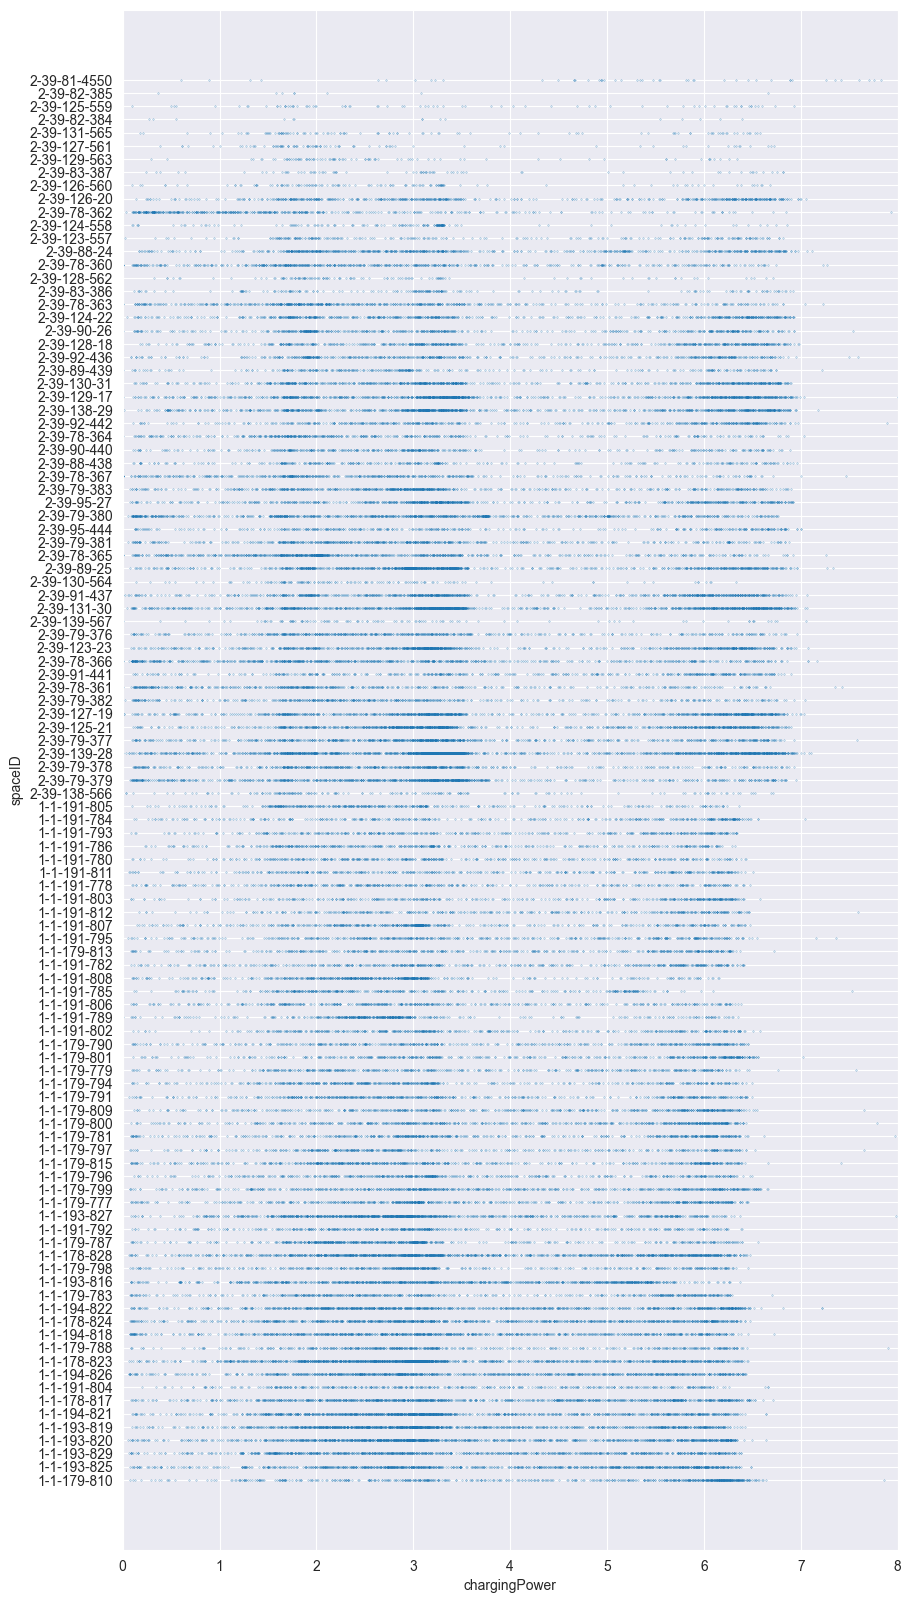

In [15]:
#plot the chargingpower against the stationID for df
plt.figure(figsize=(10, 20))
plt.scatter(df["chargingPower"], df["stationID"], s=.04)
plt.xlabel("chargingPower")
plt.xlim(0,8)
#plt.ylim(0,15)
#plt.xscale("symlog")
plt.ylabel("spaceID")


In [16]:

df.groupby("stationID").agg({"chargingPower": ["count", "mean"], "durationUntilFullCharge": ["count", "mean"], "duration": ["count", "mean"]})



chargingPower           durationUntilFullCharge            \
                    count      mean                   count      mean   
stationID                                                               
1-1-178-817           996  3.736561                     942  4.487087   
1-1-178-823          1496  3.312916                    1407  3.083015   
1-1-178-824           969  3.628708                     909  4.187698   
1-1-178-828          1313  3.665838                    1246  3.426089   
1-1-179-777           657  3.893460                     615  4.041777   
...                   ...       ...                     ...       ...   
2-39-91-441           458  4.159761                     444  2.865079   
2-39-92-436           562  3.755103                     546  2.590271   
2-39-92-442           509  4.156626                     492  3.328581   
2-39-95-27            745  3.818982                     721  2.989075   
2-39-95-444           400  3.809665                     390  3.355721   

            duration            
               count      mean  
stationID                       
1-1-178-817      996  6.891355  
1-1-178-823     1496  5.758814  
1-1-178-824      969  6.611741  
1-1-178-828     1313  5.775978  
1-1-179-777      657  6.990222  
...              ...       ...  
2-39-91-441      458  6.171926  
2-39-92-436      562  6.390322  
2-39-92-442      509  6.913297  
2-39-95-27       745  6.836948  
2-39-95-444      400  6.455553  

[107 rows x 6 columns]

In [17]:
#plot stationID against spaceID
plt.figure(figsize=(10, 20))
plt.scatter(df["stationID"], df["spaceID"], s=.04)
plt.xlabel("stationID")
plt.ylabel("spaceID")
plt.show()


KeyError: 'spaceID'

<Figure size 1000x2000 with 0 Axes>